In [1]:
import ISRAnalysis as an

Welcome to JupyROOT 6.14/04


In [2]:
binDef = "_FineCoarse"
detUnfold_muon_2016 = an.ISRAnalysis("2016", "muon", False, "matrix", \
                                     "Detector_Dressed_DR4PI_Fiducial", "Detector_Dressed_DR4PI", binDef)

ISRUnfold set!
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Detector_Dressed_DR4PI_Fiducial/Pt_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Rec_Pt
Gen_binName: Detector_Dressed_DR4PI_Fiducial/Pt_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Gen_Pt
ISRUnfold::setMassBindEdges 
0 th mass bin edge: 40
1 th mass bin edge: 64
2 th mass bin edge: 81
3 th mass bin edge: 101
4 th mass bin edge: 200
5 th mass bin edge: 320
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Detector_Dressed_DR4PI_Fiducial/Mass_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Rec_Mass
Gen_binName: Detector_Dressed_DR4PI_Fiducial/Mass_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Gen_Mass
ISRUnfold::setMassBindEdges 
ISRUnfold::setMassBindEdges massBinEdges already set.


Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #71
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 72 input bins and 72 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=72) input bins for nx=72 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #73


In [3]:
sigma = detUnfold_muon_2016.checkMatrixCond()

Decompose(), successed? 1
Mass, Cond(): 3.58594

In [4]:
#sigma.Print()

In [5]:
detUnfold_muon_2016.checkMatrixCond("Pt")

<ROOT.TVectorT<double> object ("TVectorT<double>") at 0x7408758>

Decompose(), successed? 1
Pt, Cond(): 6.86052

In [6]:
# Nominal
detUnfold_muon_2016.setInputHist(False, False, None, "Detector")
detUnfold_muon_2016.setUnfoldBkgs(False, "Detector")

In [7]:
systematics = {"ID":["IdSFUp", "IdSFDown"], "ISO":["IsoSFUp", "IsoSFDown"], "TRG":["trgSFUp", "trgSFDown"], \
              "PU":["PUUp", "PUDown"], "Scale":["ScaleABUp", "ScaleABDown"], "AlphaS":["AlphaSUp", "AlphaSDown"]}
              #"Fake":["FakeUp", "FakeDown"]}
    
#systematics = {"ID":["IdSFUp", "IdSFDown"], "TRG":["trgSFUp", "trgSFDown"], \
#              "PU":["PUUp", "PUDown"], "Scale":["ScaleABUp", "ScaleABDown"], "AlphaS":["AlphaSUp", "AlphaSDown"]}

for sysName, postfixs in systematics.items():
    for postfix in postfixs:
        detUnfold_muon_2016.setSystematics(sysName, postfix)


Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #71
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 72 input bins and 72 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=72) input bins for nx=72 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #73
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding 

In [8]:
for sysName, postfixs in systematics.items():
    for postfix in postfixs:
        print(sysName + " " + postfix)
        detUnfold_muon_2016.setInputHist(False, False, None, "Detector", True, sysName, postfix)
        detUnfold_muon_2016.setUnfoldBkgs(True, "Detector", sysName, postfix)

        detUnfold_muon_2016.subFake(True, sysName,postfix)


ID IdSFUp
ID IdSFDown
ISO IsoSFUp
ISO IsoSFDown
TRG trgSFUp
TRG trgSFDown
PU PUUp
PU PUDown
Scale ScaleABUp
Scale ScaleABDown
AlphaS AlphaSUp
AlphaS AlphaSDown


In [9]:
detUnfold_muon_2016.subFake() # Subract DY fake (out of fiducial volume at gen level)

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M2.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M3.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M4.png has been created


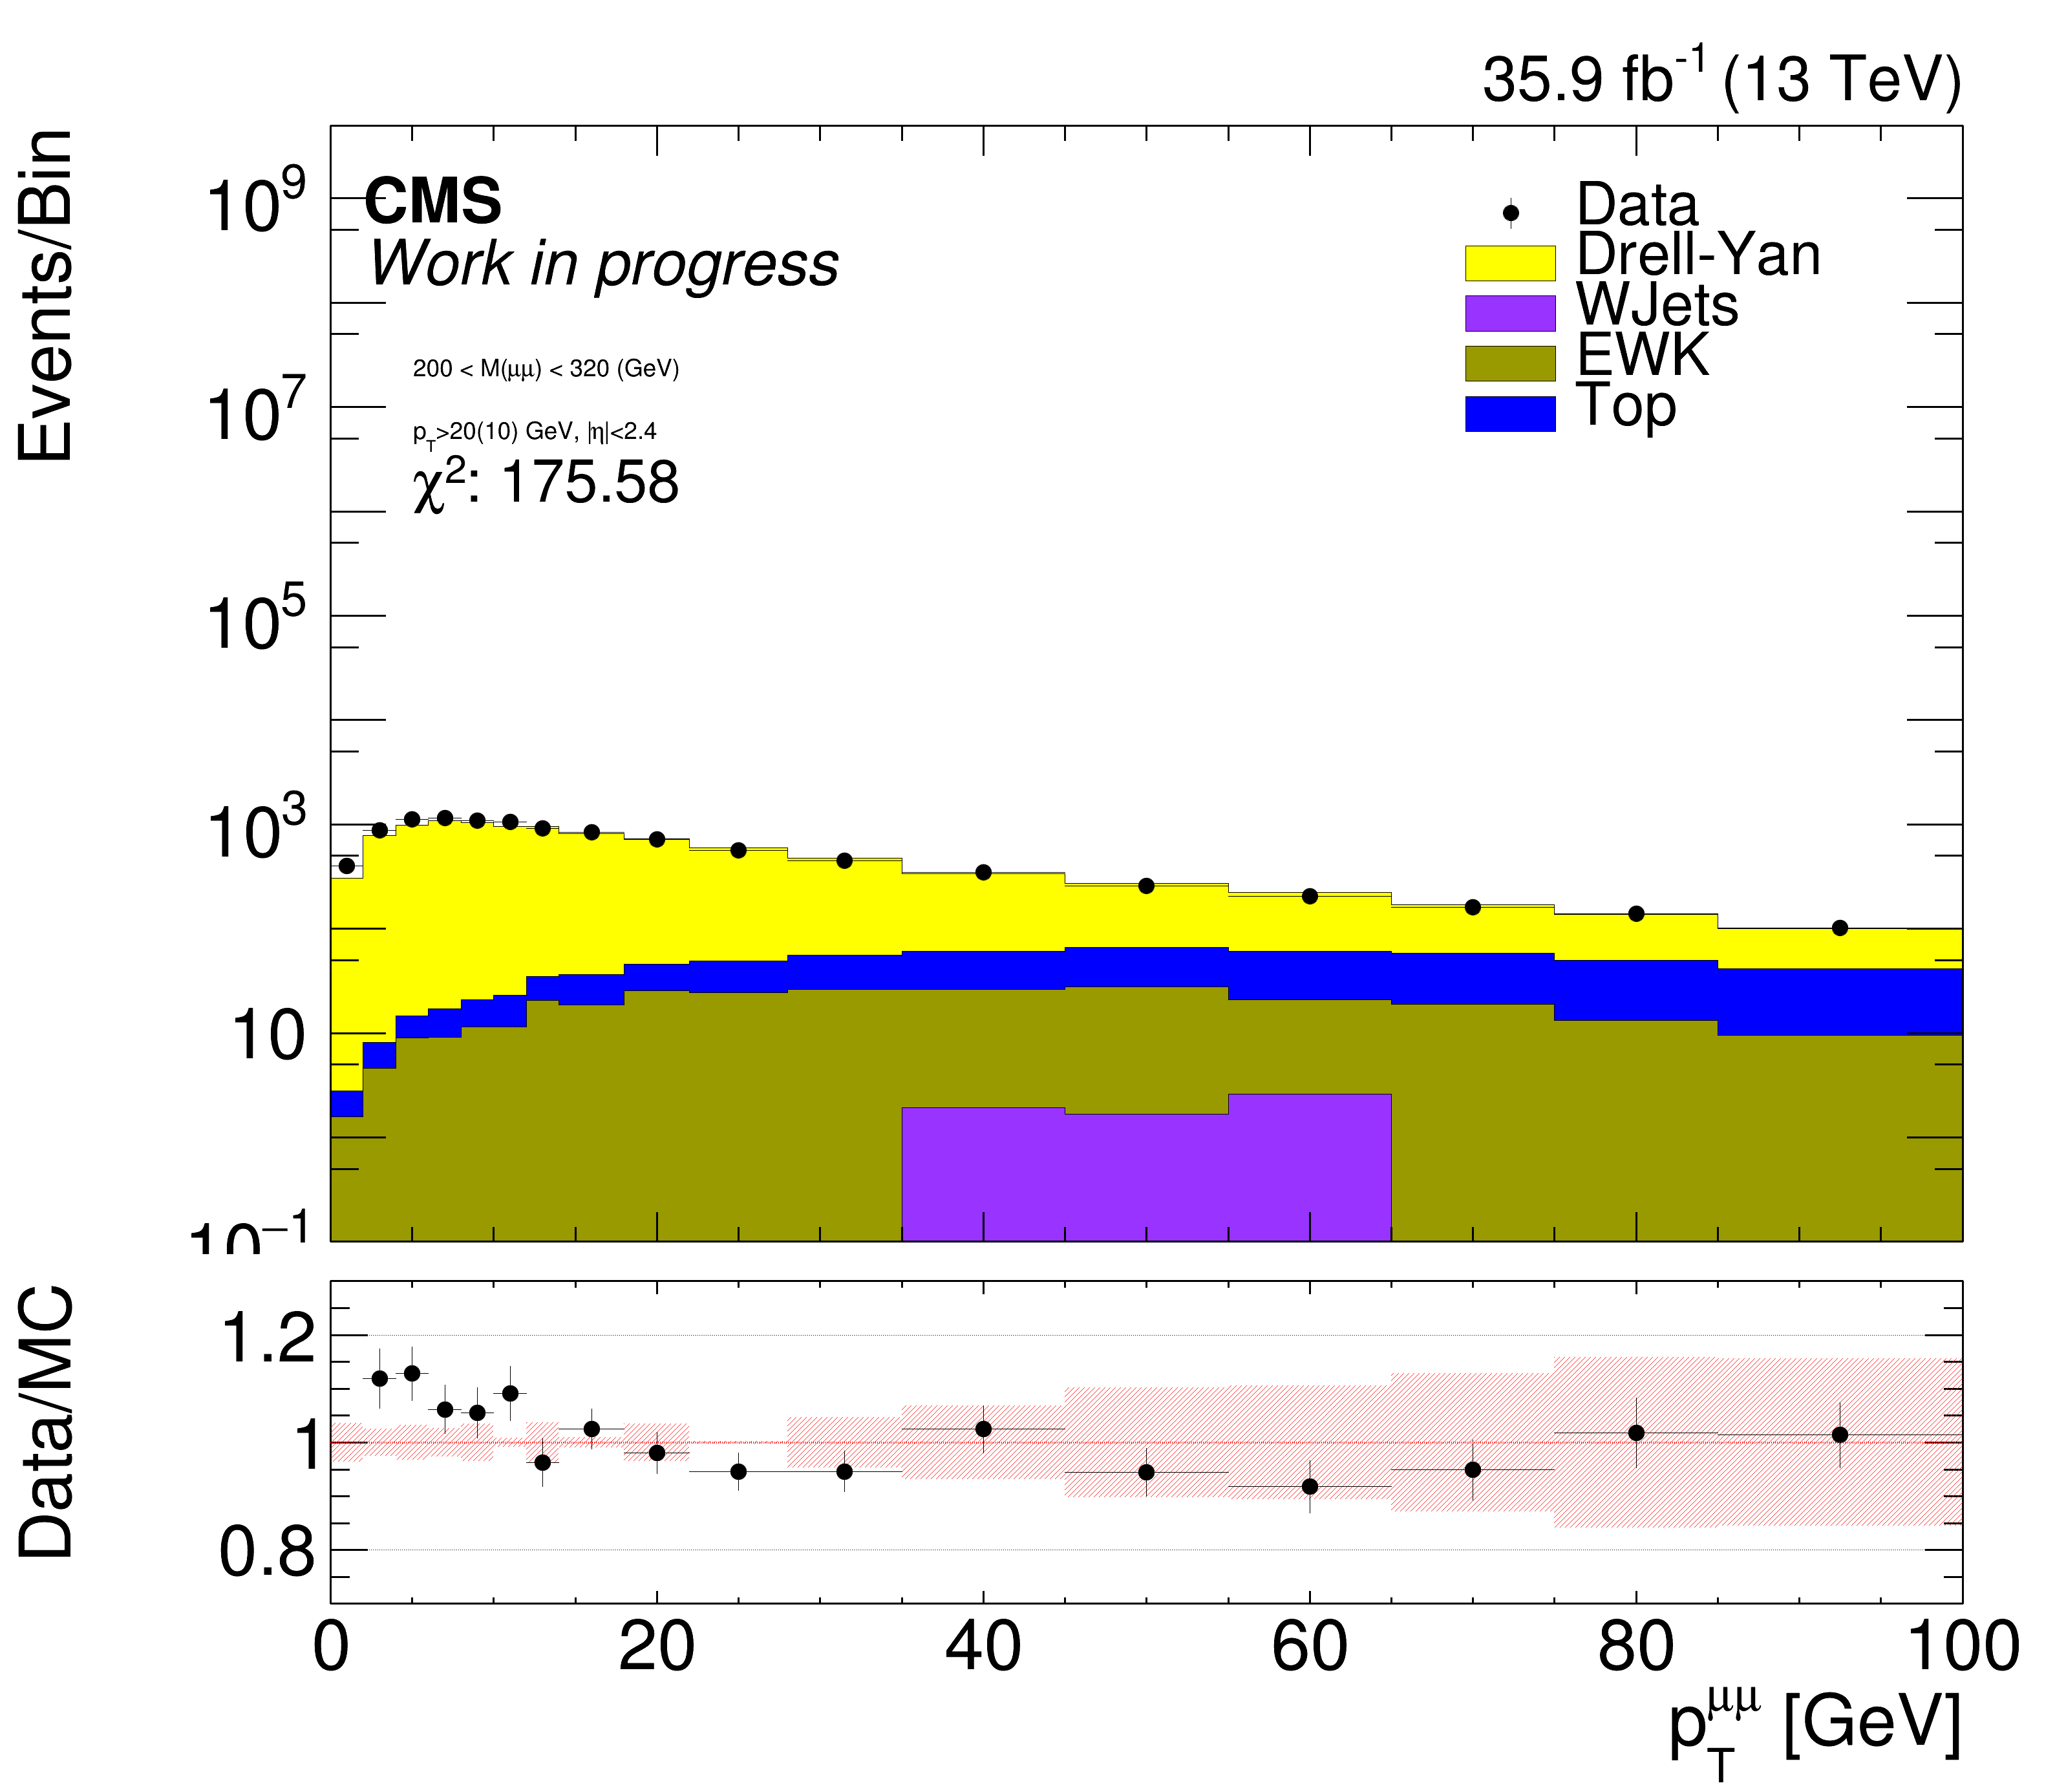

In [24]:
# 
for massBin in range(5):
    detUnfold_muon_2016.drawDetPlot("Pt"+binDef, "Detector", "pt[UO];mass[UOC"+str(massBin)+"]", True, "Scale", "DiPt_M"+str(massBin), massBin, True)

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: png file detector_Mass_FineCoarse.png has been created


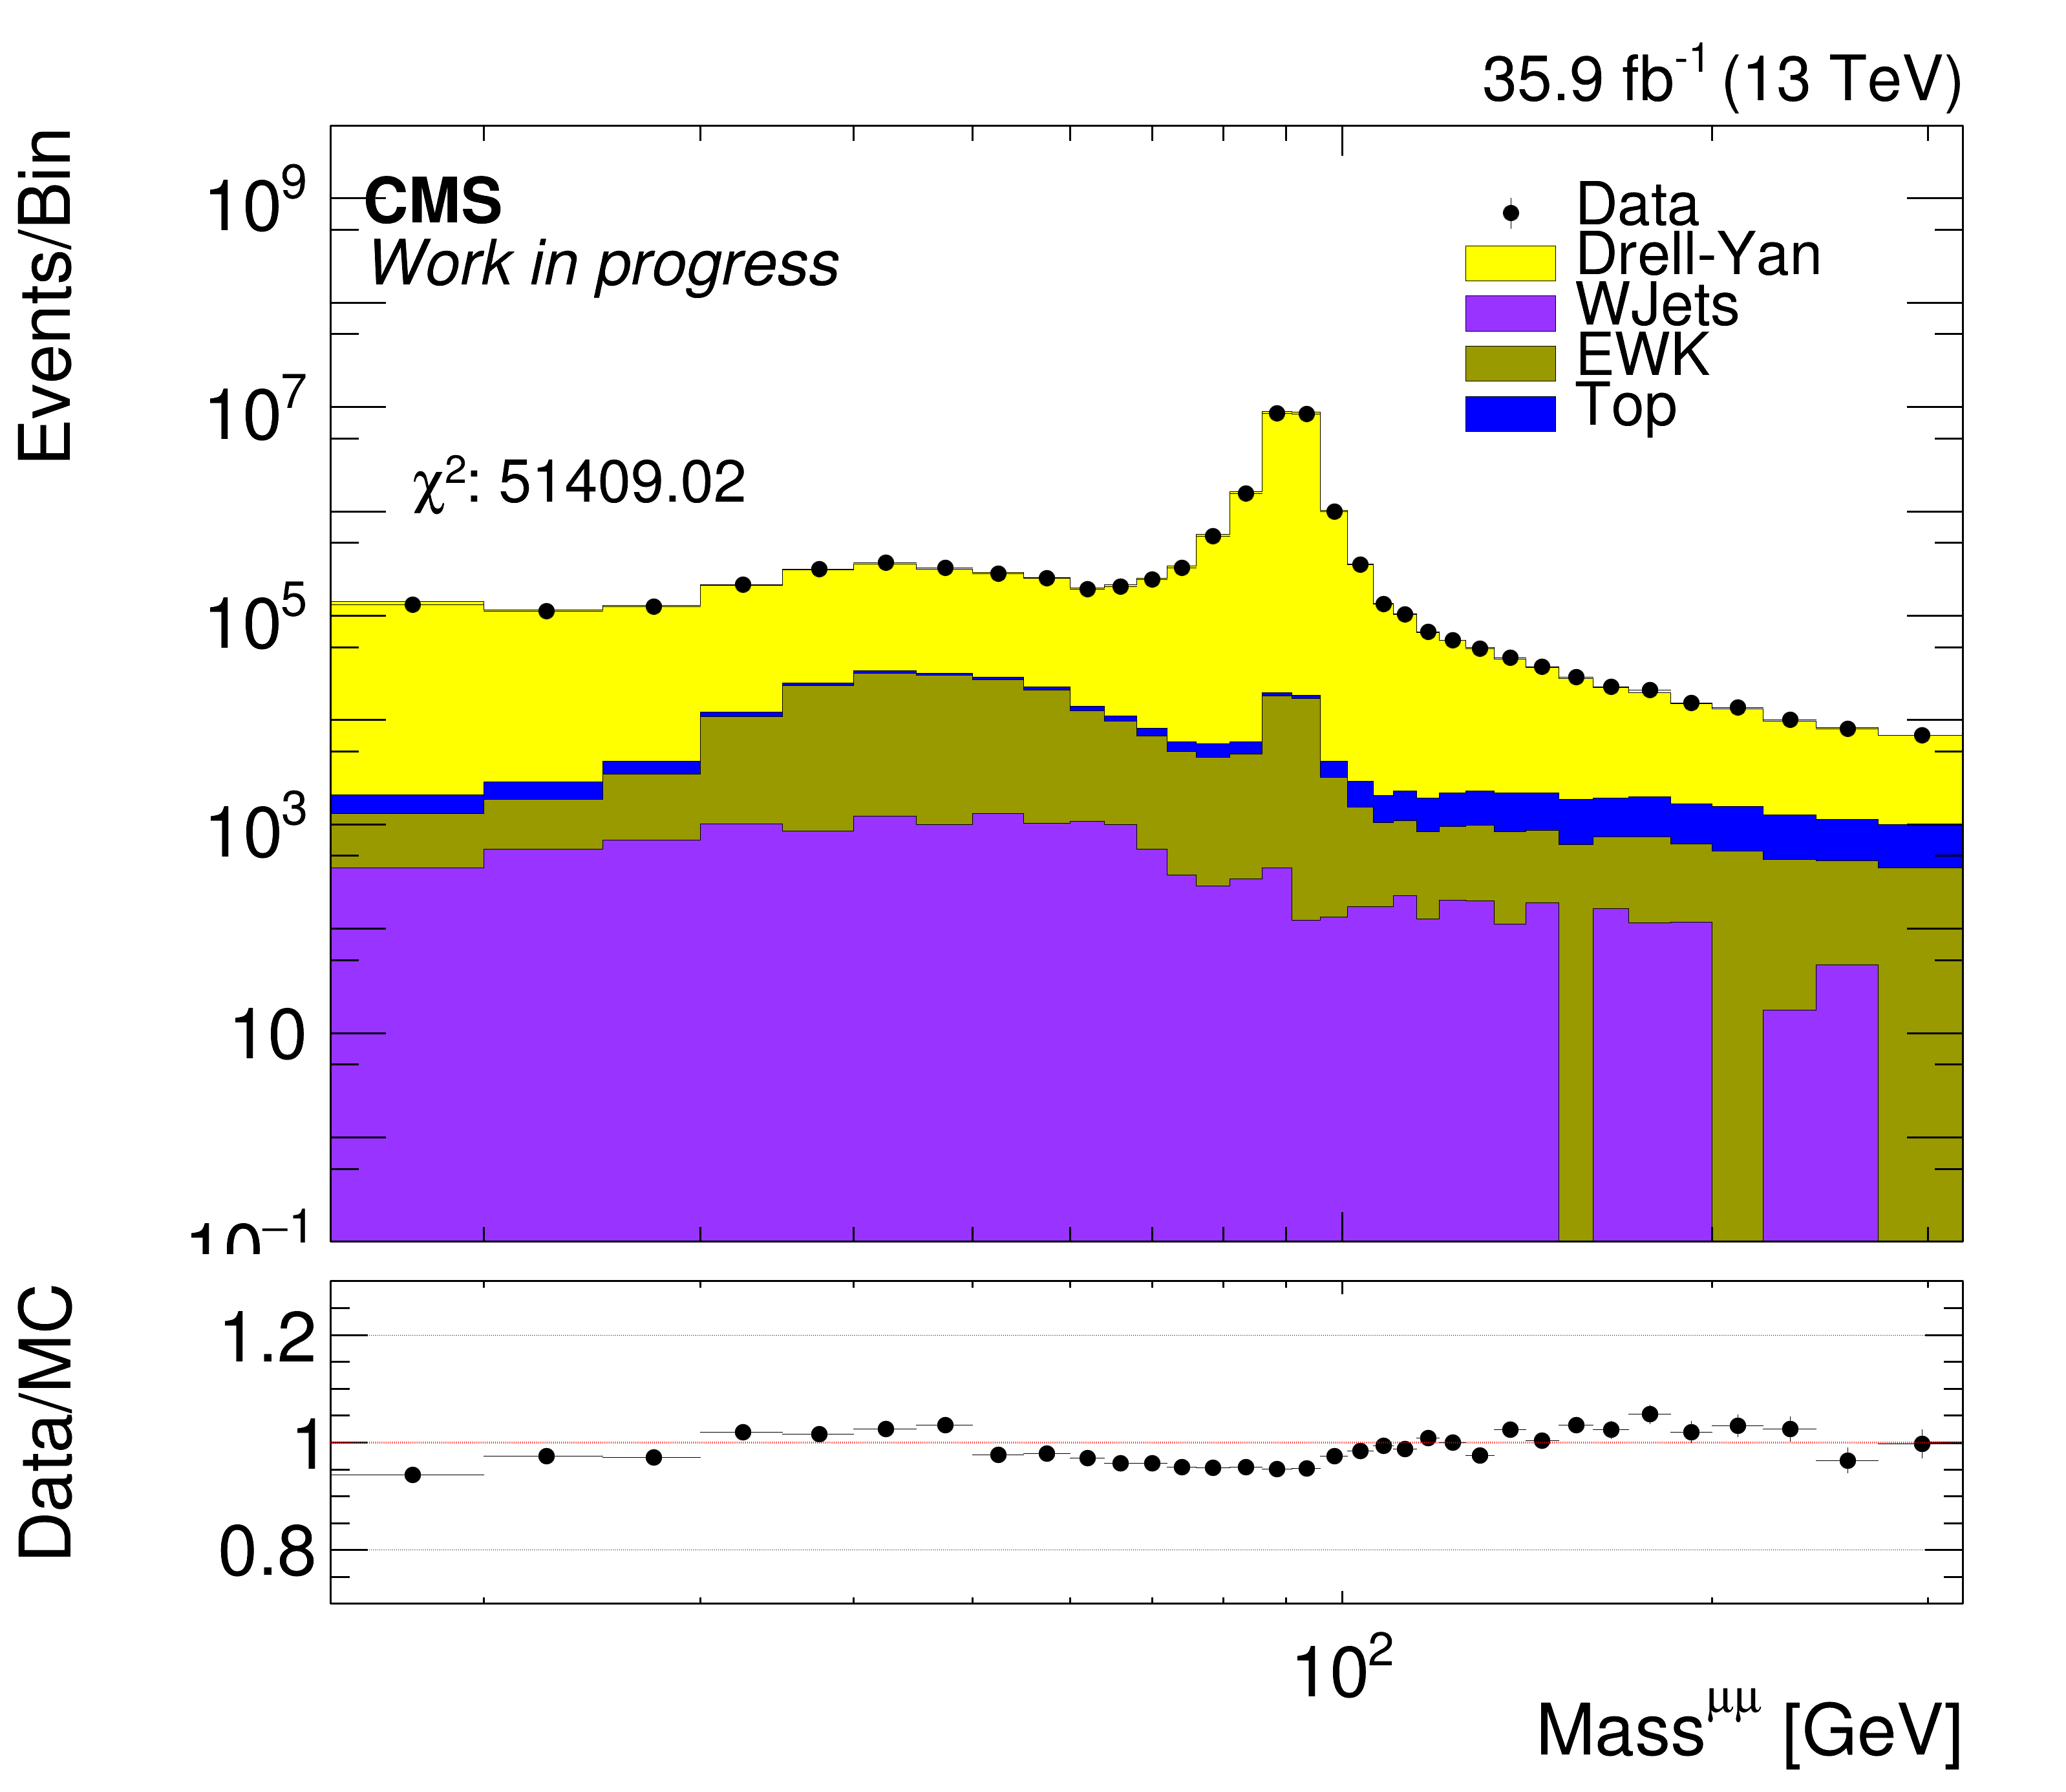

In [11]:
detUnfold_muon_2016.drawDetPlot("Mass"+binDef, "Detector", "mass[UO];pt[UOC0]", True, "")

In [12]:
#for massBin in range(0,5):
#    detUnfold_muon_2016.drawDetPlot("Pt_1D", "Detector_M_"+str(massBin), "", True, "AlphaS", "DiPt_M"+str(massBin)+"1GeVBin", massBin)

In [13]:
detUnfold_muon_2016.doUnfold()

Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed


In [14]:
detUnfold_muon_2016.doUnfold(True)

Do systematic unfold!
Unfold for AlphaS systematic.
2 systematic variation exist.
posfix: AlphaSUp
posfix: AlphaSDown
Unfold for ID systematic.
2 systematic variation exist.
posfix: IdSFUp
posfix: IdSFDown
Unfold for ISO systematic.
2 systematic variation exist.
posfix: IsoSFUp
posfix: IsoSFDown
Unfold for PU systematic.
2 systematic variation exist.
posfix: PUUp
posfix: PUDown
Unfold for Scale systematic.
2 systematic variation exist.
posfix: ScaleABUp
posfix: ScaleABDown
Unfold for TRG systematic.
2 systematic variation exist.
posfix: trgSFUp
posfix: trgSFDown


Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: 

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: png file unfolded_Mass.png has been created


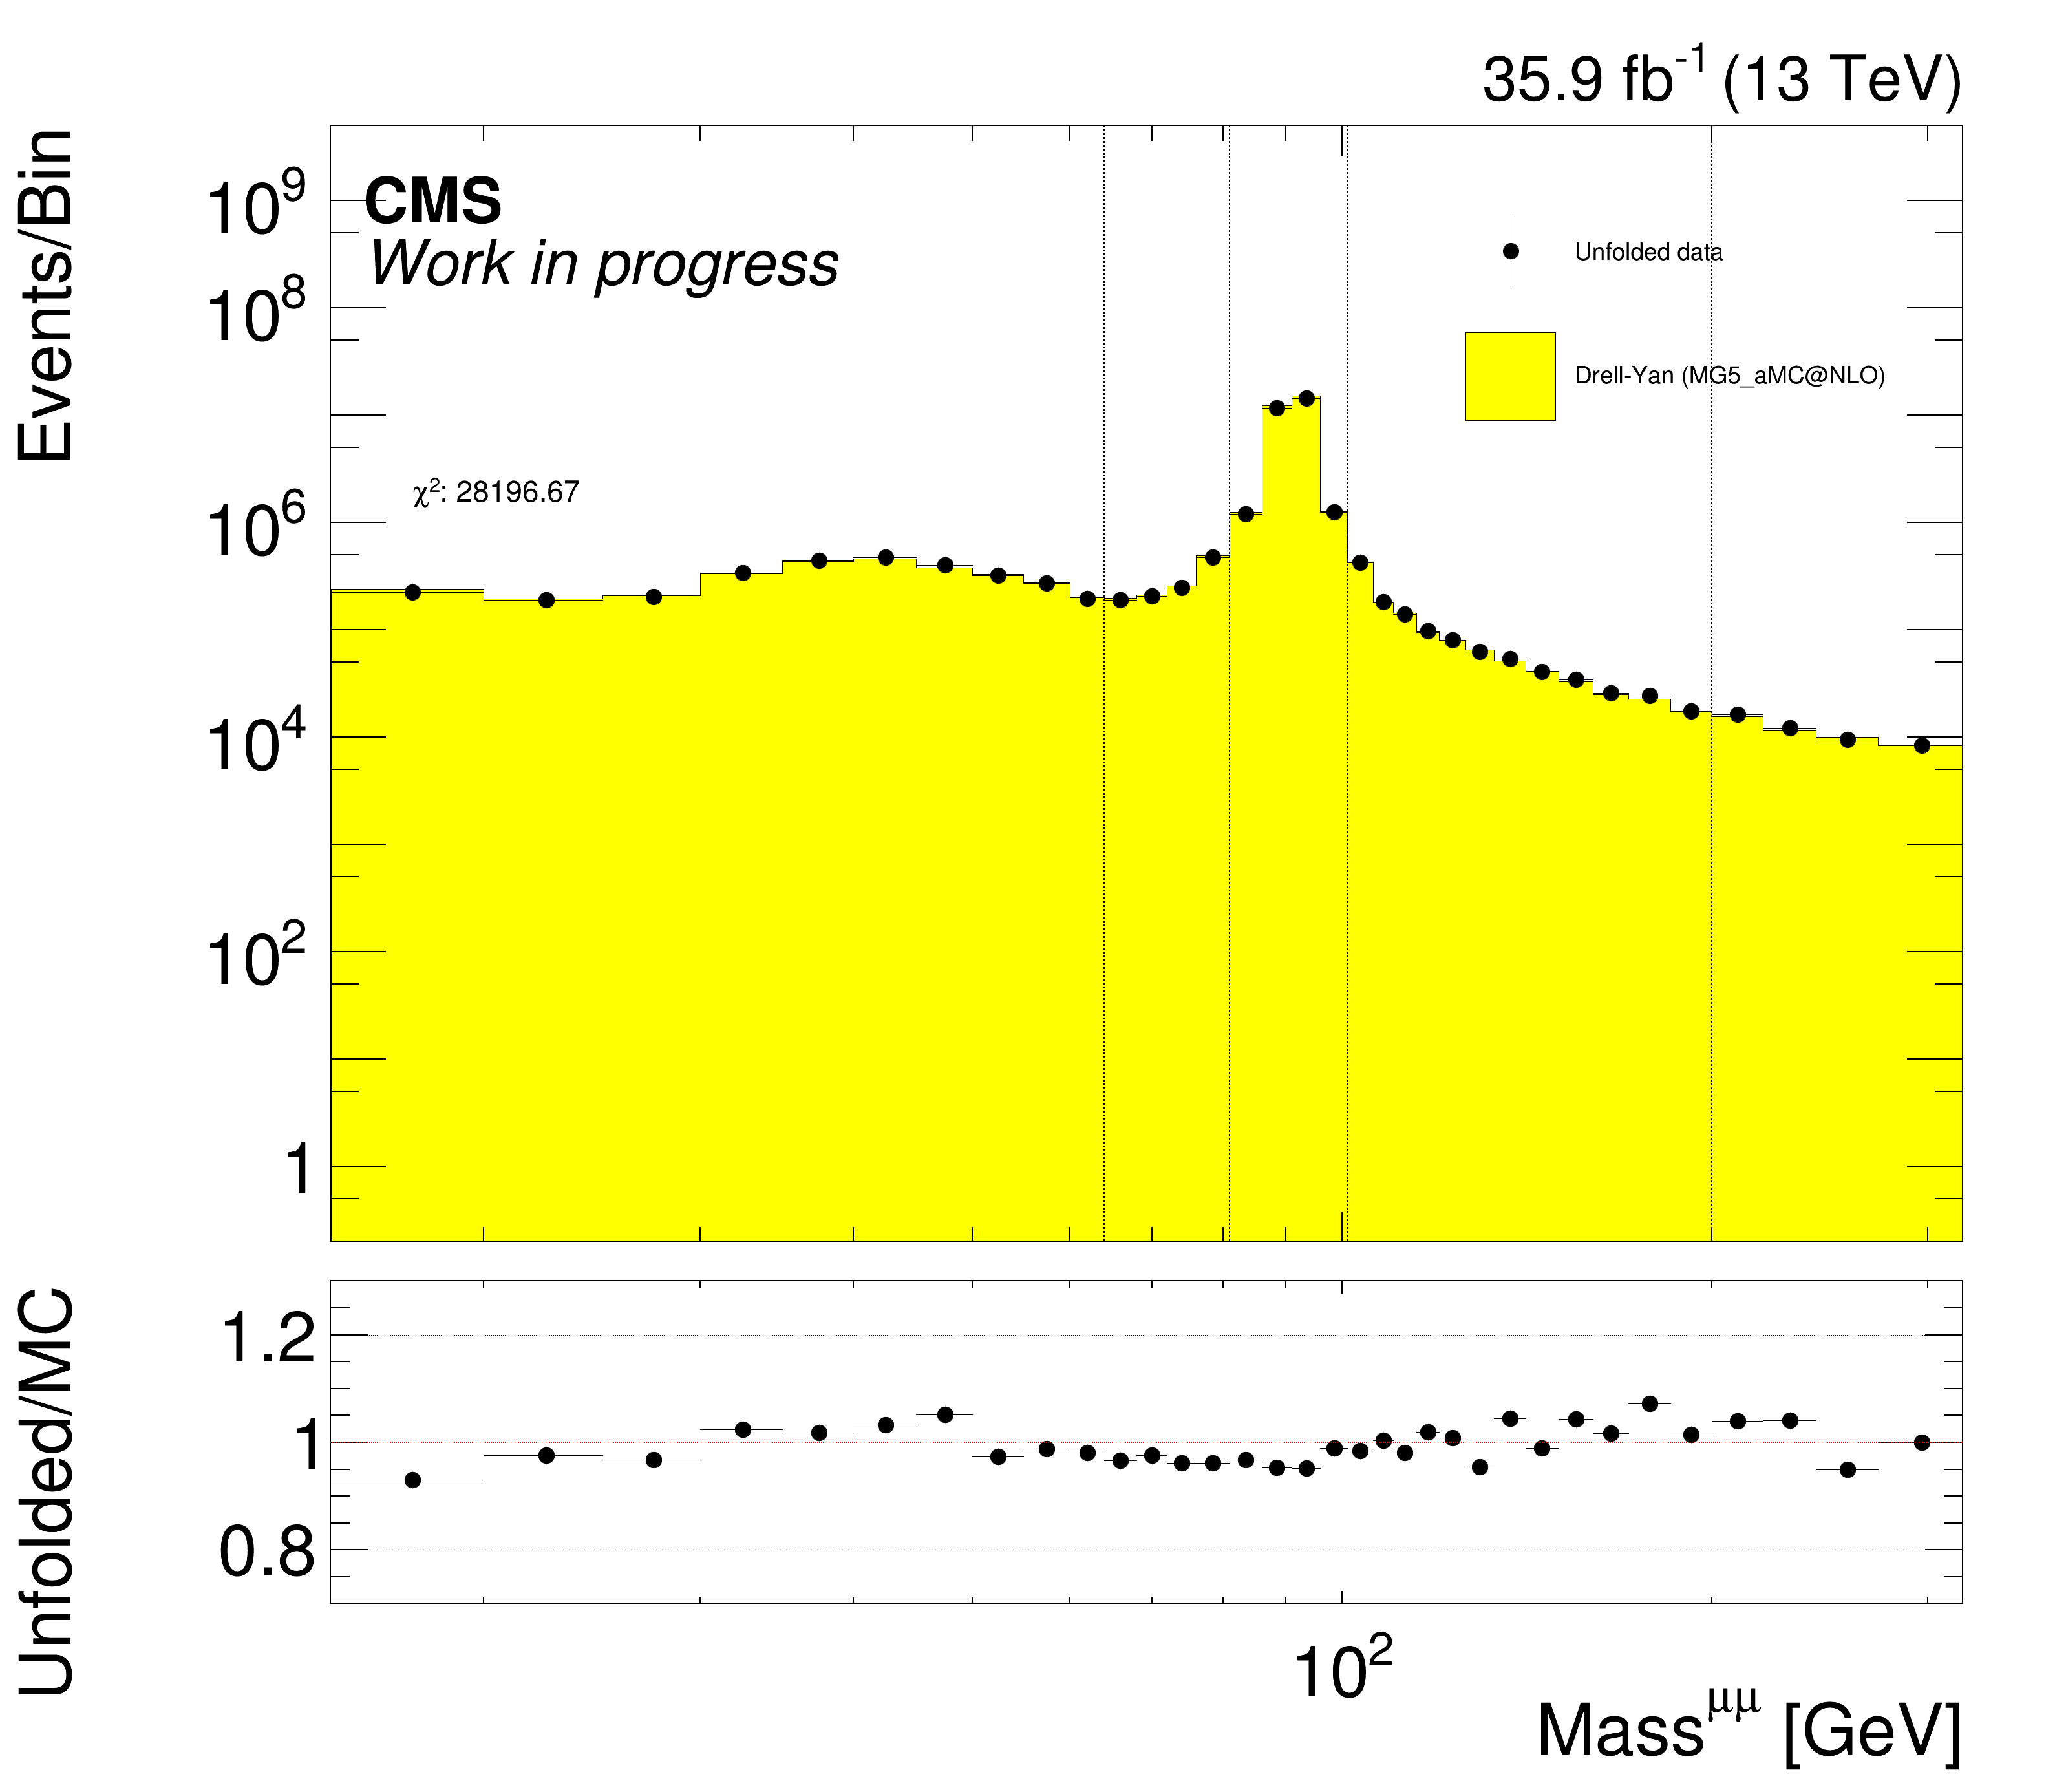

In [15]:
detUnfold_muon_2016.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "")

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: png file UnfDiPt_M0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M2.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M3.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M4.png has been created


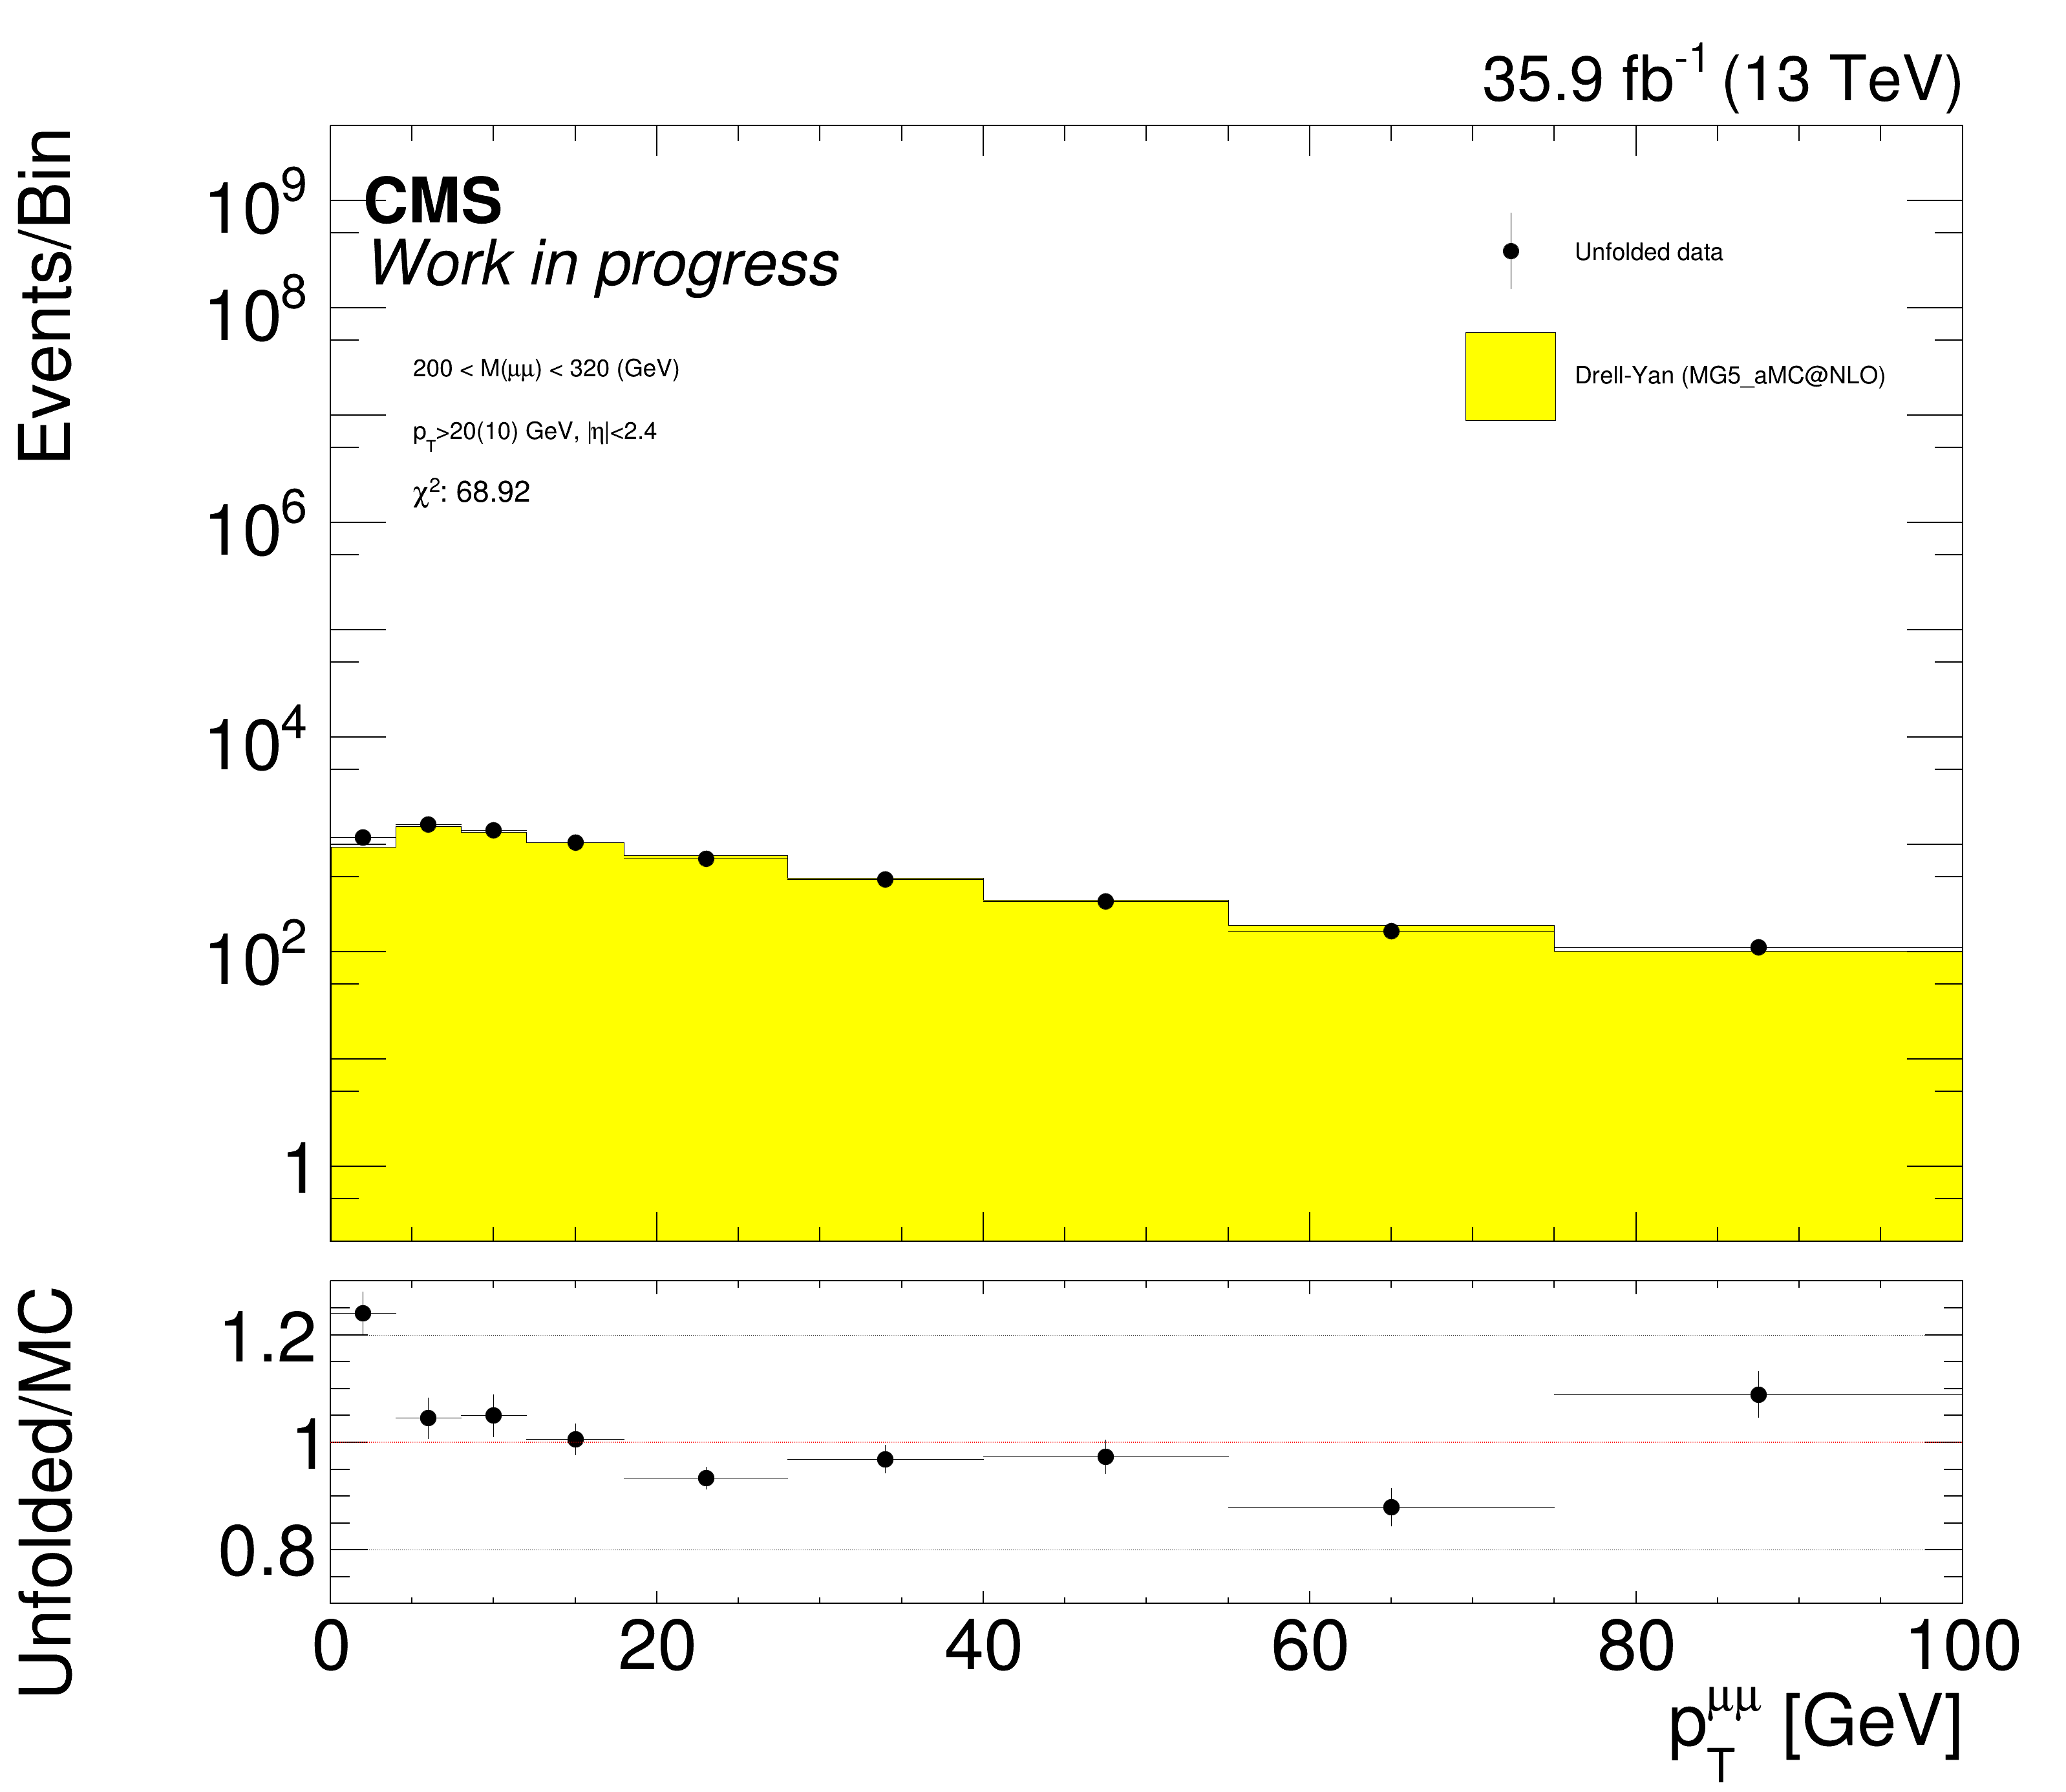

In [16]:
for massBin in range(5):
    detUnfold_muon_2016.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "UnfDiPt_M"+str(massBin), massBin, True)

In [17]:
detUnfold_muon_2016.setMeanValues()

ISRUnfold::setMeanMass()   Save mean of dilepton...
ISRUnfold::setMeanPt()   Save mean of dilepton momentum...


In [18]:
detUnfold_muon_2016.setSysMeanValues()

ISRUnfold::setSysMeanMass()   Save mean of dilepton...
Unfold for AlphaS systematic.
2 systematic variation exist.
AlphaS AlphaSUp 50.3831
AlphaS AlphaSUp 73.8212
AlphaS AlphaSUp 91.2549
AlphaS AlphaSUp 117.794
AlphaS AlphaSUp 241.116
AlphaS AlphaSDown 50.381
AlphaS AlphaSDown 73.8184
AlphaS AlphaSDown 91.2545
AlphaS AlphaSDown 117.801
AlphaS AlphaSDown 241.128
Unfold for ID systematic.
2 systematic variation exist.
ID IdSFUp 50.3868
ID IdSFUp 73.8273
ID IdSFUp 91.255
ID IdSFUp 117.752
ID IdSFUp 241.102
ID IdSFDown 50.3728
ID IdSFDown 73.8182
ID IdSFDown 91.2546
ID IdSFDown 117.827
ID IdSFDown 241.125
Unfold for ISO systematic.
2 systematic variation exist.
ISO IsoSFUp 50.388
ISO IsoSFUp 73.8281
ISO IsoSFUp 91.2556
ISO IsoSFUp 117.788
ISO IsoSFUp 241.113
ISO IsoSFDown 50.3716
ISO IsoSFDown 73.8174
ISO IsoSFDown 91.254
ISO IsoSFDown 117.791
ISO IsoSFDown 241.114
Unfold for PU systematic.
2 systematic variation exist.
PU PUUp 50.3841
PU PUUp 73.8178
PU PUUp 91.2558
PU PUUp 117.778
PU PUU

In [19]:
detUnfold_muon_2016.setSysError()

Systematic: AlphaS 0 mass bin 
mass: 0.00326482 pt: 0.0284634
Systematic: AlphaS 1 mass bin 
mass: 0.00441132 pt: 0.0181037
Systematic: AlphaS 2 mass bin 
mass: 0.000252477 pt: 0.00206904
Systematic: AlphaS 3 mass bin 
mass: 0.0118315 pt: 0.0179349
Systematic: AlphaS 4 mass bin 
mass: 0.0143005 pt: 0.0757334
Systematic: ID 0 mass bin 
mass: 0.00704313 pt: 0.0069538
Systematic: ID 1 mass bin 
mass: 0.00454989 pt: 0.021597
Systematic: ID 2 mass bin 
mass: 0.000162195 pt: 0.0302056
Systematic: ID 3 mass bin 
mass: 0.0373467 pt: 0.0320786
Systematic: ID 4 mass bin 
mass: 0.0111691 pt: 0.0486522
Systematic: ISO 0 mass bin 
mass: 0.0082348 pt: 0.0164735
Systematic: ISO 1 mass bin 
mass: 0.005403 pt: 0.00976542
Systematic: ISO 2 mass bin 
mass: 0.000840531 pt: 0.0112583
Systematic: ISO 3 mass bin 
mass: 0.00156555 pt: 0.010183
Systematic: ISO 4 mass bin 
mass: 0.000746636 pt: 0.0142503
Systematic: PU 0 mass bin 
mass: 0.0042607 pt: 0.003585
Systematic: PU 1 mass bin 
mass: 0.00492292 pt: 0.01

In [20]:
detUnfold_muon_2016.setTotSysError()

In [21]:
gr_2016_muon_det_unfold =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDetUnf")
gr_2016_muon_det_unfold_sys =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDetUnf",True,True)

In [22]:
gr_2016_muon_det =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDet", False)

20.1 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: png file Run2_detector.png has been created


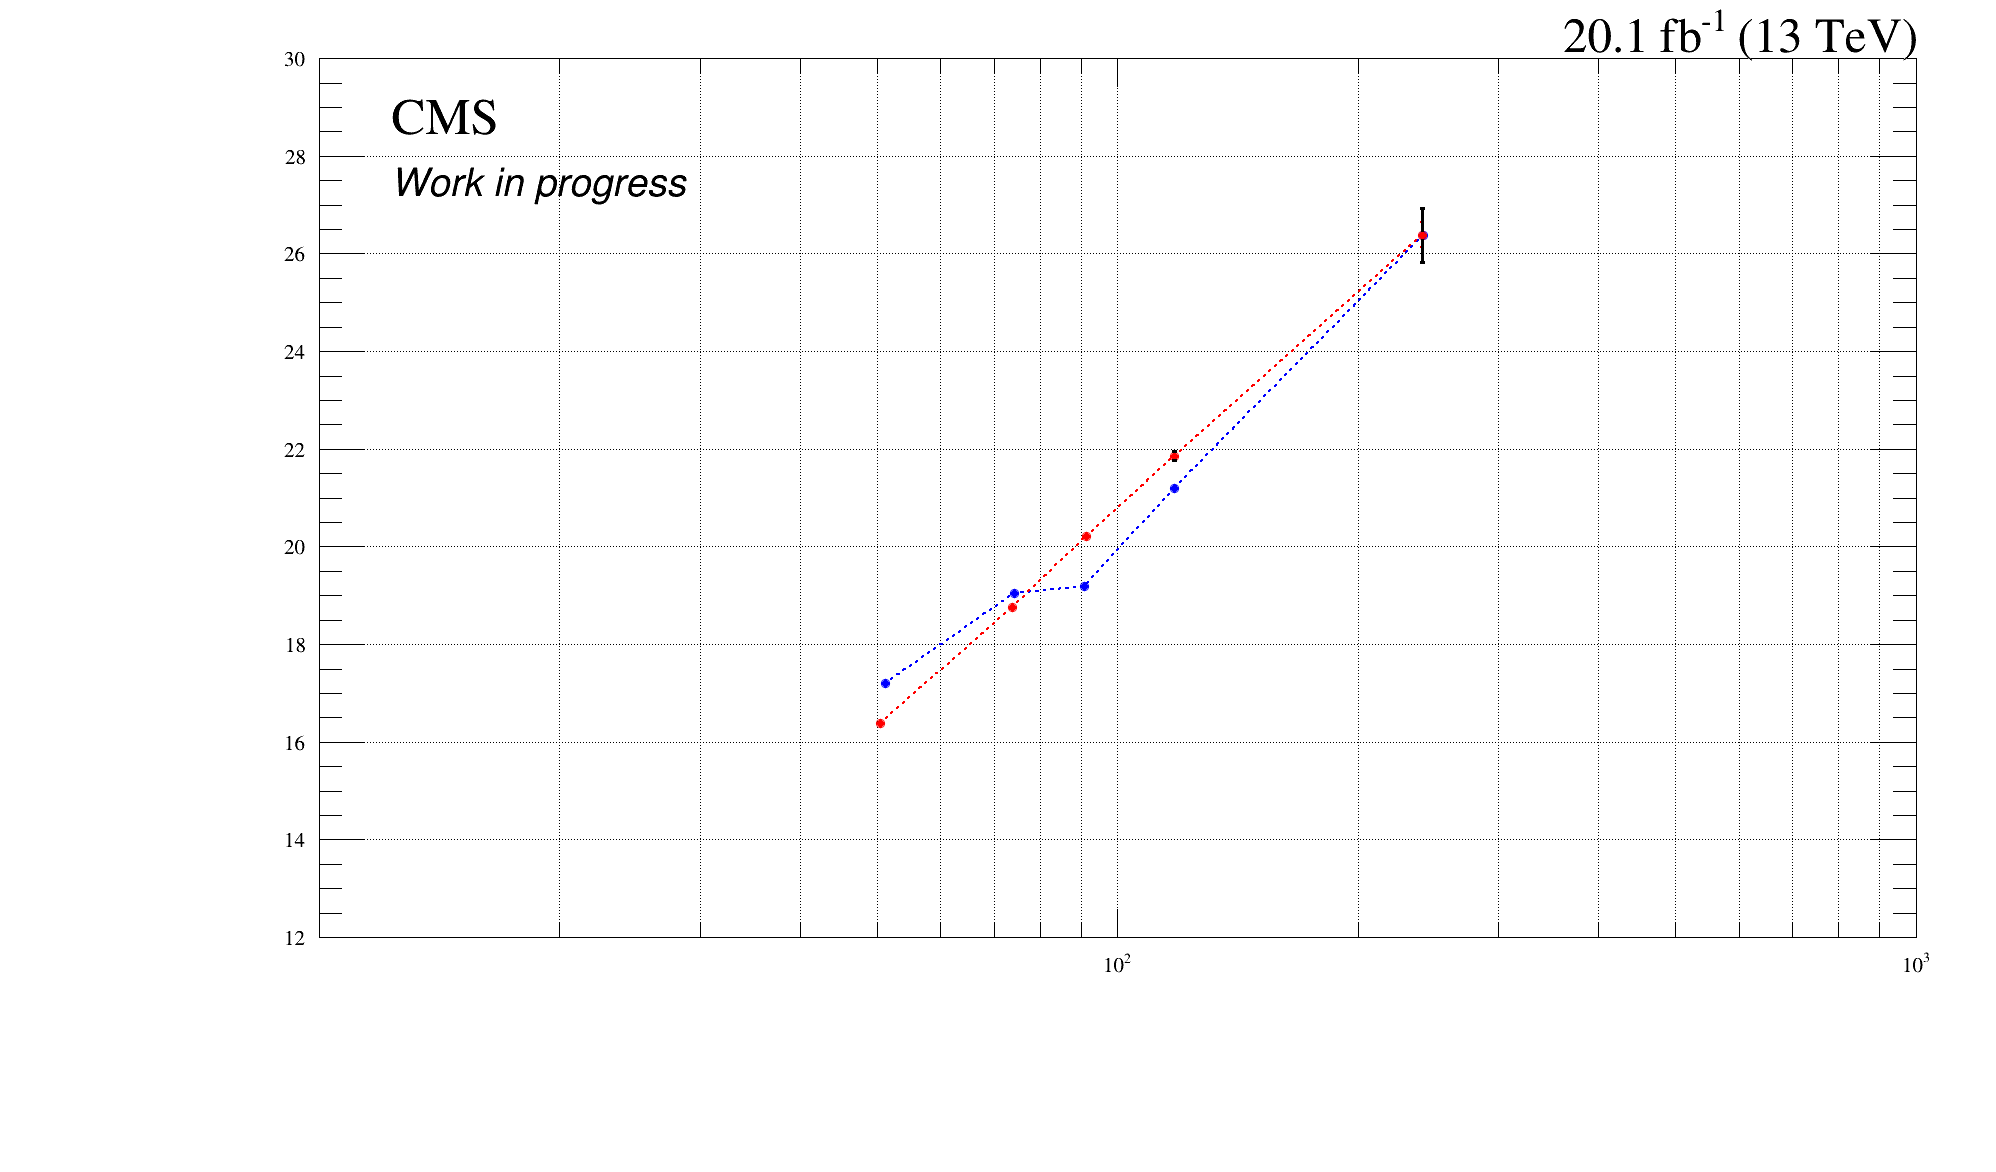

In [23]:
import pyScripts.tdrStyle as tdrStyle
import pyScripts.CMS_lumi as CMS_lumi
import ROOT as rt
markerSize = 1.2

tdrStyle.setTDRStyle()
rt.gStyle.SetOptFit(0)

c_PtVsMass_detector = rt.TCanvas("PtVsMass_detector","PtVsMass_detector", 2000, 1200)
c_PtVsMass_detector.SetGridx()
c_PtVsMass_detector.SetGridy()
c_PtVsMass_detector.SetLogx()
c_PtVsMass_detector.SetBottomMargin(0.2)

gr_2016_muon_det.SetTitle("2016, 2017, 2018 Detector level")
gr_2016_muon_det.Draw("APL")
gr_2016_muon_det.GetYaxis().SetRangeUser(12., 30.)
gr_2016_muon_det.GetXaxis().SetLimits(10., 1000.)
gr_2016_muon_det.SetMarkerStyle(20)
gr_2016_muon_det.SetLineStyle(2)
gr_2016_muon_det.SetMarkerSize(markerSize)
gr_2016_muon_det.SetMarkerColor(rt.kBlue)
gr_2016_muon_det.SetLineColor(rt.kBlue)

gr_2016_muon_det_unfold.Draw("PL SAME")
gr_2016_muon_det_unfold.SetLineWidth(2)
gr_2016_muon_det_unfold.SetMarkerColor(rt.kRed)
gr_2016_muon_det_unfold.SetLineStyle(2)
gr_2016_muon_det_unfold.SetLineColor(rt.kRed)

gr_2016_muon_det_unfold_sys.Draw("E SAME")
gr_2016_muon_det_unfold_sys.SetLineWidth(3)
gr_2016_muon_det_unfold_sys.SetMarkerColor(rt.kBlack)
gr_2016_muon_det_unfold_sys.SetLineColor(rt.kBlack)

CMS_lumi.extraText = "Work in progress"
CMS_lumi.CMS_lumi(c_PtVsMass_detector, 4, 11)
c_PtVsMass_detector.Draw()
c_PtVsMass_detector.SaveAs("Run2_detector.png")